800
done


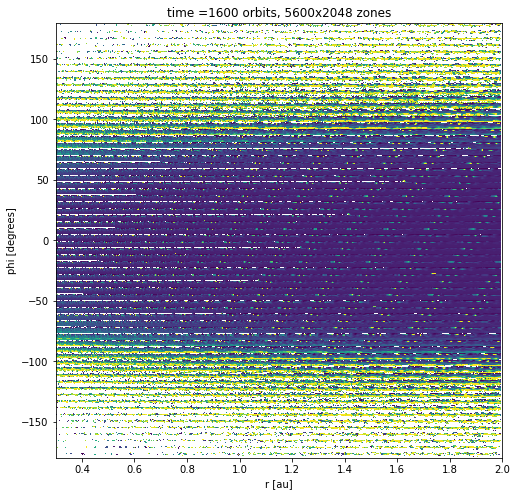

In [53]:
import readfargo as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path = './p3disof_test/'
#path = './bae2017_03jup1400x512/'

nstart = 80
itime = nstart
r0 = 1.0
fargo3d    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_3dinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_2d = fargo    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
fargo_2dinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)



phi = np.loadtxt(path +'domain_x.dat')
rad1  = np.loadtxt(path +'domain_y.dat')[3:-3]

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                  \     $

rad1   = 0.5*(rad1[:-1] + rad1[1:])

rad2d,phi2d = np.meshgrid(rad1, phi) #explain meshgrid?                                                                                                                 \     $


X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

nx = len(phi)
ny = len(rad1)
nz = len(fargo3d.theta)
nf = nstart
print(nf*10)
#-------------------------2d sum------------------
rho_init   = pl.fromfile(path +'gasdens0.dat').reshape(nx,ny,nz).sum(axis=2)
rho   = pl.fromfile(path+'gasdens' + str(nf) + '.dat').reshape(nx,ny,nz).sum(axis=2)
vphi_init   = pl.fromfile(path + 'gasvx0.dat').reshape(nx,ny,nz).sum(axis=2)
vphi   = pl.fromfile(path+'gasvx' + str(nf) + '.dat').reshape(nx,ny,nz).sum(axis=2)
vrad     = pl.fromfile(path+'gasvy' + str(nf) + '.dat').reshape(nx,ny,nz).sum(axis=2)
vrad_init = pl.fromfile(path+'gasvy0.dat').reshape(nx,ny,nz).sum(axis=2)
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad2d
omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad2d
vmin = -1.
vmax = 12.
levels = np.linspace(vmin,vmax,128)


dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv = ((rad2d*vphi)[:,1:]-(rad2d*vphi)[:,:-1])/(rad2d[:,1:]-rad2d[:,:-1])
#pv = pv[:,:-1]
pv -= ((vrad[:,1:]-vrad[:,:-1])/dphi)[:,:]
pv /= rad2d[:,:-1]
pv /= rho[:,:-1]
pv_original = pv

pv_init = ((rad2d*vphi_init)[:,1:]-(rad2d*vphi_init)[:,:-1])/(rad2d[:,1:]-rad2d[:,:-1])
#pv = pv[:,:-1]
pv_init -= ((vrad_init[:,1:]-vrad_init[:,:-1])/dphi)[:,:]
pv_init /= rad2d[:,:-1]
pv_init /= rho_init[:,:-1]
pv_original_init = pv_init
#-------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(fargo3d.r[1:], fargo3d.phi[:]*180/np.pi, (pv_original), levels=levels)
ax.set_xlim(0.3,2)
#ax.set_ylim(-50,50)
ax.set_xlabel('r [au]')
ax.set_ylabel('phi [degrees]')
ax.set_title(f'time ='+ str(nf*20) +' orbits, 5600x2048 zones')
#plt.savefig('PV_image3mjup.png',dpi = 300)
print('done')

In [48]:
print((((vrad[:,1:]-vrad[:,:-1])/dphi)[:,:]).shape)


(1400, 511)
